In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV, RFE
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv('hcp_drug_prediction_data_cleaned.csv')
# data['Age_recoded'] = data['Age_recoded'].astype('category')
# data['Gender_recoded'] = data['Gender_recoded'].astype('category')
# print(data.dtypes)

In [3]:
data.head()

,Subject,PSQI_Score,PicSeq_AgeAdj,CardSort_AgeAdj,Flanker_AgeAdj,PMAT24_A_CR,PMAT24_A_SI,PMAT24_A_RTCR,ReadEng_AgeAdj,PicVocab_AgeAdj,...,PercStress_Unadj,SelfEff_Unadj,NEOFAC_A,NEOFAC_O,NEOFAC_C,NEOFAC_N,NEOFAC_E,sub_use,Age_recoded,Gender_recoded
0,100004,8,112.44,88.64,111.01,19.0,0.0,15590.0,96.91405,104.9375,...,55.4,39.6,27.0,15.0,28.0,24.0,25.0,0,1,0
1,100206,6,118.78,104.94,116.55,20.0,0.0,18574.5,103.44410,117.0361,...,57.8,44.0,29.0,23.0,26.0,21.0,32.0,0,2,0
2,100307,4,103.45,109.92,101.90,17.0,2.0,11839.0,98.73000,96.8100,...,57.9,37.5,37.0,24.0,35.0,15.0,37.0,0,2,1
3,100408,4,125.19,100.77,113.51,7.0,12.0,3042.0,125.64000,132.6300,...,46.8,56.4,33.0,29.0,34.0,15.0,33.0,1,3,0
4,100610,4,101.69,115.18,114.18,23.0,0.0,12280.0,132.41240,146.5971,...,37.8,53.2,31.0,33.0,36.0,7.0,15.0,0,2,0


In [4]:
X = data.drop(['Subject', 'sub_use', 'Gender_recoded'], axis = 1)
y = data['sub_use']

In [5]:
# from sklearn.preprocessing import StandardScaler, OneHotEncoder

# dataset = pd.read_csv("http://www.ats.ucla.edu/stat/data/binary.csv")
# print(dataset.head(5))

# # Define which columns should be encoded vs scaled
# columns_to_encode = ['rank']
# columns_to_scale  = ['gre', 'gpa']

# # Instantiate encoder/scaler
# scaler = StandardScaler()
# ohe    = OneHotEncoder(sparse=False)

# # Scale and Encode Separate Columns
# scaled_columns  = scaler.fit_transform(dataset[columns_to_scale]) 
# encoded_columns =    ohe.fit_transform(dataset[columns_to_encode])

# # Concatenate (Column-Bind) Processed Columns Back Together
# processed_data = np.concatenate([scaled_columns, encoded_columns], axis=1)

In [6]:
cols_to_encode = ['Age_recoded']
cols_to_scale = X.columns
cols_to_scale = list(set(X.columns) - set(cols_to_encode))
print(cols_to_encode)

['Age_recoded']


In [7]:
scaler = StandardScaler()
# ohe = OneHotEncoder(sparse = False)

In [8]:
scaled_cols = scaler.fit_transform(X[cols_to_scale]) # scale the continuous variables
# encoded_cols = ohe.fit_transform(X[cols_to_encode]) # dummy code the categorical variables

In [9]:
# print(encoded_cols.shape)

In [10]:
print(scaled_cols.shape)
print(scaled_cols[:10])

(1169, 71)
[[-8.69212376e-01  1.54567845e-01 -2.27349144e+00 -7.82692380e-02
   9.04873964e-01  3.34424078e-01 -1.09155798e+00 -1.31337054e+00
  -1.98883585e+00  1.09707045e+00  1.11988443e+00 -8.53160896e-01
  -1.35383694e+00  4.57481325e-01 -2.21382554e-01  7.54864311e-01
  -1.24739443e+00  4.74977317e-01  2.75658060e-01 -1.33990939e+00
   9.52953240e-01  6.40129848e-01 -1.68526840e+00  2.44501446e+00
  -4.97686597e-01 -1.08373621e+00 -1.34440118e+00 -1.44369581e+00
   5.06357310e-01 -1.45765953e+00  1.85220314e-01 -2.48265324e+00
  -1.74980324e+00 -5.03829663e-01 -2.21561719e-01 -9.44785643e-01
  -9.84084449e-01  2.32009575e-01 -9.94697250e-01 -1.21959642e+00
  -1.08672446e+00  9.82099151e-01 -6.63214727e-01 -1.03825435e+00
  -1.33288544e+00 -1.36594884e+00  1.86664296e-01 -1.58972877e+00
  -1.36534178e+00  2.48481940e+00 -8.03643222e-01 -6.19622167e-01
   1.29260766e+00  6.89614869e-01  1.03825435e+00  1.16601743e-01
   2.29180665e-01 -8.97637211e-01  1.03911039e+00 -8.99870734e-01

In [11]:
print(y.shape)
print(scaled_cols.shape)
print(type(scaled_cols))
print(type(data['Age_recoded']))
# print(type(encoded_cols))
# X_scaled_encoded = np.concatenate((scaled_cols, encoded_cols), axis = 1)
X_scaled = pd.concat([pd.DataFrame(scaled_cols, columns = X.columns[:len(cols_to_scale)]), data['Age_recoded']], axis = 1)
X_scaled_array = np.array(X_scaled)

(1169,)
(1169, 71)
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [12]:
# print(__doc__)

# import matplotlib.pyplot as plt
# from sklearn.svm import SVC
# from sklearn.model_selection import StratifiedKFold
# from sklearn.feature_selection import RFECV
# from sklearn.datasets import make_classification

# # Build a classification task using 3 informative features
# X, y = make_classification(n_samples=1000, n_features=25, n_informative=3,
#                            n_redundant=2, n_repeated=0, n_classes=8,
#                            n_clusters_per_class=1, random_state=0)

# # Create the RFE object and compute a cross-validated score.
# svc = SVC(kernel="linear")
# # The "accuracy" scoring is proportional to the number of correct
# # classifications
# rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
#               scoring='accuracy')
# rfecv.fit(X, y)

# print("Optimal number of features : %d" % rfecv.n_features_)

# # Plot number of features VS. cross-validation scores
# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score (nb of correct classifications)")
# plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
# plt.show()

In [13]:
log_reg = LogisticRegression(penalty = 'l1', solver = 'liblinear', class_weight='balanced')
# rfecv = RFECV(log_reg, step = 1, cv = StratifiedKFold(5), scoring = 'accuracy')
rfecv = RFECV(log_reg, step = 1, cv = StratifiedKFold(5), scoring = 'accuracy')
rfecv.fit(X_scaled_array,y)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='warn', n_jobs=None,
                                   penalty='l1', random_state=None,
                                   solver='liblinear', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

Optimal number of features : 13


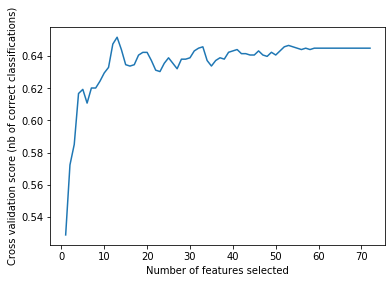

In [14]:
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [31]:
rfecv.grid_scores_[0]

0.5286568061145724

In [15]:
print(rfecv.support_.sum())
print(rfecv.support_)
X_columns = X_scaled.columns
print(X_columns)

13
[False False False  True False  True False  True  True False False False
 False False False False False False False  True False  True False False
 False  True False False False False False False  True False False False
 False False False False  True False False False False False False False
 False False False False False False False False False  True False False
  True False False  True False False False False False False  True False]
Index(['PSQI_Score', 'PicSeq_AgeAdj', 'CardSort_AgeAdj', 'Flanker_AgeAdj',
       'PMAT24_A_CR', 'PMAT24_A_SI', 'PMAT24_A_RTCR', 'ReadEng_AgeAdj',
       'PicVocab_AgeAdj', 'ProcSpeed_AgeAdj', 'DDisc_SV_1mo_200',
       'DDisc_SV_6mo_200', 'DDisc_SV_1yr_200', 'DDisc_SV_3yr_200',
       'DDisc_SV_5yr_200', 'DDisc_SV_10yr_200', 'DDisc_SV_1mo_40K',
       'DDisc_SV_6mo_40K', 'DDisc_SV_1yr_40K', 'DDisc_SV_3yr_40K',
       'DDisc_SV_5yr_40K', 'DDisc_SV_10yr_40K', 'DDisc_AUC_200',
       'DDisc_AUC_40K', 'VSPLOT_TC', 'VSPLOT_CRTE', 'VSPLOT_OFF', 'SCPT_TP',
 

In [16]:
X_columns[rfecv.support_]

Index(['Flanker_AgeAdj', 'PMAT24_A_SI', 'ReadEng_AgeAdj', 'PicVocab_AgeAdj',
       'DDisc_SV_3yr_40K', 'DDisc_SV_10yr_40K', 'VSPLOT_CRTE', 'SCPT_SEN',
       'CogTotalComp_AgeAdj', 'PosAffect_Unadj', 'PercHostil_Unadj',
       'InstruSupp_Unadj', 'NEOFAC_E'],
      dtype='object')

In [17]:
svc = SVC(kernel = 'linear', class_weight='balanced')
# rfecv = RFECV(log_reg, step = 1, cv = StratifiedKFold(5), scoring = 'accuracy')
rfecv_svc = RFECV(svc, step = 1, cv = StratifiedKFold(5), scoring = 'accuracy')
rfecv_svc.fit(X_scaled_array,y)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
                    decision_function_shape='ovr', degree=3,
                    gamma='auto_deprecated', kernel='linear', max_iter=-1,
                    probability=False, random_state=None, shrinking=True,
                    tol=0.001, verbose=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

Optimal number of features : 9


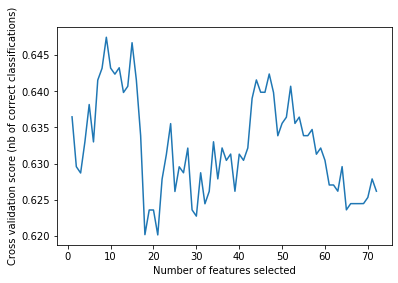

In [19]:
print("Optimal number of features : %d" % rfecv_svc.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv_svc.grid_scores_) + 1), rfecv_svc.grid_scores_)
plt.show()

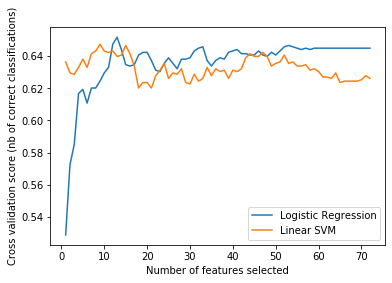

In [20]:
# Plot number of features VS. cross-validation scores for the svm and logistic regression models
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1,len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, label = 'Logistic Regression')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv_svc.grid_scores_, label = 'Linear SVM')
plt.legend()
plt.show()

In [33]:
X_scaled_columns = np.array(X_scaled.columns)
remaining_features = []
for i in range(1,len(X.columns)):
    if i%5 == 0:
        print(i)
    model=RFE(log_reg, n_features_to_select = i)
    model.fit(X_scaled,y)
    supports_idx = model.get_support()
    supports = X_scaled_columns[supports_idx]
    remaining_features.append(supports)
    if i < len(X.columns):
        model = None


5
10
15
20
25
30
35
40
45
50
55
60
65
70


In [34]:
# print(len(remaining_features))
for i in range(len(remaining_features)):
    print(remaining_features[i])

['PMAT24_A_SI']
['PMAT24_A_SI' 'NEOFAC_E']
['PMAT24_A_SI' 'PercHostil_Unadj' 'NEOFAC_E']
['PMAT24_A_SI' 'VSPLOT_CRTE' 'PercHostil_Unadj' 'NEOFAC_E']
['PMAT24_A_SI' 'PicVocab_AgeAdj' 'VSPLOT_CRTE' 'PercHostil_Unadj'
 'NEOFAC_E']
['PMAT24_A_SI' 'PicVocab_AgeAdj' 'DDisc_SV_3yr_40K' 'VSPLOT_CRTE'
 'PercHostil_Unadj' 'NEOFAC_E']
['PMAT24_A_SI' 'PicVocab_AgeAdj' 'DDisc_SV_3yr_40K' 'VSPLOT_CRTE'
 'CogTotalComp_AgeAdj' 'PercHostil_Unadj' 'NEOFAC_E']
['PMAT24_A_SI' 'PicVocab_AgeAdj' 'DDisc_SV_3yr_40K' 'DDisc_SV_10yr_40K'
 'VSPLOT_CRTE' 'CogTotalComp_AgeAdj' 'PercHostil_Unadj' 'NEOFAC_E']
['PMAT24_A_SI' 'PicVocab_AgeAdj' 'DDisc_SV_3yr_40K' 'DDisc_SV_10yr_40K'
 'VSPLOT_CRTE' 'CogTotalComp_AgeAdj' 'PosAffect_Unadj' 'PercHostil_Unadj'
 'NEOFAC_E']
['PMAT24_A_SI' 'PicVocab_AgeAdj' 'DDisc_SV_3yr_40K' 'DDisc_SV_10yr_40K'
 'VSPLOT_CRTE' 'SCPT_SEN' 'CogTotalComp_AgeAdj' 'PosAffect_Unadj'
 'PercHostil_Unadj' 'NEOFAC_E']
['Flanker_AgeAdj' 'PMAT24_A_SI' 'PicVocab_AgeAdj' 'DDisc_SV_3yr_40K'
 'DDisc_SV_10yr_

In [35]:
X_scaled_columns = np.array(X_scaled.columns)
svc_remaining_features = []
for i in range(1,len(X.columns)):
    if i%5 == 0:
        print(i)
    model=RFE(svc, n_features_to_select = i)
    model.fit(X_scaled,y)
    supports_idx = model.get_support()
    supports = X_scaled_columns[supports_idx]
    svc_remaining_features.append(supports)
    if i < len(X.columns):
        model = None


5
10
15
20
25
30
35
40
45
50
55
60
65
70


In [36]:
# print(len(remaining_features))
for i in range(len(svc_remaining_features)):
    print(svc_remaining_features[i])

['NEOFAC_E']
['PMAT24_A_SI' 'NEOFAC_E']
['PMAT24_A_SI' 'DDisc_SV_10yr_40K' 'NEOFAC_E']
['PMAT24_A_SI' 'DDisc_SV_3yr_40K' 'DDisc_SV_10yr_40K' 'NEOFAC_E']
['PMAT24_A_SI' 'DDisc_SV_3yr_40K' 'DDisc_SV_10yr_40K'
 'CogTotalComp_AgeAdj' 'NEOFAC_E']
['PMAT24_A_SI' 'DDisc_SV_3yr_40K' 'DDisc_SV_10yr_40K'
 'CogTotalComp_AgeAdj' 'PosAffect_Unadj' 'NEOFAC_E']
['PMAT24_A_SI' 'PicVocab_AgeAdj' 'DDisc_SV_3yr_40K' 'DDisc_SV_10yr_40K'
 'CogTotalComp_AgeAdj' 'PosAffect_Unadj' 'NEOFAC_E']
['PMAT24_A_SI' 'PicVocab_AgeAdj' 'DDisc_SV_3yr_40K' 'DDisc_SV_10yr_40K'
 'CogTotalComp_AgeAdj' 'PosAffect_Unadj' 'PercHostil_Unadj' 'NEOFAC_E']
['PMAT24_A_SI' 'PicVocab_AgeAdj' 'DDisc_SV_3yr_40K' 'DDisc_SV_10yr_40K'
 'VSPLOT_CRTE' 'CogTotalComp_AgeAdj' 'PosAffect_Unadj' 'PercHostil_Unadj'
 'NEOFAC_E']
['Flanker_AgeAdj' 'PMAT24_A_SI' 'PicVocab_AgeAdj' 'DDisc_SV_3yr_40K'
 'DDisc_SV_10yr_40K' 'VSPLOT_CRTE' 'CogTotalComp_AgeAdj' 'PosAffect_Unadj'
 'PercHostil_Unadj' 'NEOFAC_E']
['Flanker_AgeAdj' 'PMAT24_A_SI' 'ReadEng_AgeAdj

In [39]:
print(rfecv_svc.support_.sum())
print('RFECV Optimal SVM features')
print(X_scaled.columns[rfecv_svc.support_])
# 10 top measures from 'RFECV_And_10features_determination.ipynb' svc:
# 'CardSort_AgeAdj', 'DDisc_SV_1yr_200', 'DDisc_SV_1yr_40K', 'VSPLOT_OFF','CogEarlyComp_AgeAdj', 
# 'AngAggr_Unadj', 'FearSomat_Unadj','SelfEff_Unadj', 'NEOFAC_C', 'Gender_recoded'

print(rfecv.support_.sum())
print('RFECV Optimval Logistic Regression')
print(X_scaled.columns[rfecv.support_])

9
RFECV Optimal SVM features
Index(['PMAT24_A_SI', 'PicVocab_AgeAdj', 'DDisc_SV_3yr_40K',
       'DDisc_SV_10yr_40K', 'VSPLOT_CRTE', 'CogTotalComp_AgeAdj',
       'PosAffect_Unadj', 'PercHostil_Unadj', 'NEOFAC_E'],
      dtype='object')
13
RFECV Optimval Logistic Regression
Index(['Flanker_AgeAdj', 'PMAT24_A_SI', 'ReadEng_AgeAdj', 'PicVocab_AgeAdj',
       'DDisc_SV_3yr_40K', 'DDisc_SV_10yr_40K', 'VSPLOT_CRTE', 'SCPT_SEN',
       'CogTotalComp_AgeAdj', 'PosAffect_Unadj', 'PercHostil_Unadj',
       'InstruSupp_Unadj', 'NEOFAC_E'],
      dtype='object')
